# Tratamento de Dados de Remuneração de Docentes

Este notebook contém o processo de tratamento dos dados de remuneração dos docentes do Nordeste em 2020. O objetivo é preparar os dados para análise por um agente no N8N.

## 1. Importando as bibliotecas necessárias


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para visualização
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## 2. Carregando os dados

In [2]:
# Carregando o arquivo Excel
caminho_arquivo = os.path.join('datasets', 'Remuneracao_docentes_Nordeste_2020_Att.xlsx')

# Como a primeira linha já contém os valores, precisamos definir os nomes das colunas manualmente
nomes_colunas = [
    'Indice', 'ANO_CENSO', 'REGIAO', 'UF', 'DEPENDENCIA', 'CATEGORIA', 
    'NUMERO_DOCENTES', 'PERCENTUAL_DOC_TEMPO_INTEGRAL', 'REMUNERACAO_MINIMA', 
    'REMUNERACAO_MEDIANA', 'REMUNERACAO_MEDIA', 'REMUNERACAO_75_PERCENTIL', 
    'DESVIO_PADRAO_REMUNERACAO', 'COEF_VARIACAO_PERC', 'REMUNERACAO_MEDIA_40H'
]

# Lendo o arquivo com os nomes de colunas corretos
df_original = pd.read_excel(caminho_arquivo, skiprows=8, header=None, names=nomes_colunas)

print(f"Dados carregados com sucesso! Total de registros: {len(df_original)}")

# Exibindo as primeiras linhas para entender a estrutura
df_original.head()

Dados carregados com sucesso! Total de registros: 78


,Indice,ANO_CENSO,REGIAO,UF,DEPENDENCIA,CATEGORIA,NUMERO_DOCENTES,PERCENTUAL_DOC_TEMPO_INTEGRAL,REMUNERACAO_MINIMA,REMUNERACAO_MEDIANA,REMUNERACAO_MEDIA,REMUNERACAO_75_PERCENTIL,DESVIO_PADRAO_REMUNERACAO,COEF_VARIACAO_PERC,REMUNERACAO_MEDIA_40H
0,NaN,2020,Nordeste,MA,Privada,Total,13394,46.15499,1018.135,1347.79,1726.699,2011.05,1264.5090,29.69631,2325.809
1,NaN,2020,Nordeste,MA,Privada,Com Superior,8618,52.83128,1045.000,1444.93,1872.975,2220.15,1364.6590,29.10152,2574.401
2,NaN,2020,Nordeste,MA,Privada,Sem Superior,4776,34.10804,839.560,1074.02,1296.522,1478.92,759.3735,31.44549,1649.232
3,NaN,2020,Nordeste,MA,Pública,Total,98459,74.35176,2254.800,3132.49,3399.973,3933.48,1965.8720,24.32324,5591.317
4,NaN,2020,Nordeste,MA,Pública,Com Superior,66686,85.96707,2530.850,3329.33,3662.898,4139.71,2047.8710,24.03908,6094.907


## 3. Verificando informações sobre os dados

In [3]:
# Informações sobre as colunas
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Indice                         0 non-null      float64
 1   ANO_CENSO                      78 non-null     int64  
 2   REGIAO                         78 non-null     object 
 3   UF                             78 non-null     object 
 4   DEPENDENCIA                    78 non-null     object 
 5   CATEGORIA                      78 non-null     object 
 6   NUMERO_DOCENTES                78 non-null     int64  
 7   PERCENTUAL_DOC_TEMPO_INTEGRAL  78 non-null     float64
 8   REMUNERACAO_MINIMA             78 non-null     float64
 9   REMUNERACAO_MEDIANA            78 non-null     float64
 10  REMUNERACAO_MEDIA              78 non-null     float64
 11  REMUNERACAO_75_PERCENTIL       78 non-null     float64
 12  DESVIO_PADRAO_REMUNERACAO      78 non-null     float

In [4]:
# Estatísticas descritivas
df_original.describe()

,Indice,ANO_CENSO,NUMERO_DOCENTES,PERCENTUAL_DOC_TEMPO_INTEGRAL,REMUNERACAO_MINIMA,REMUNERACAO_MEDIANA,REMUNERACAO_MEDIA,REMUNERACAO_75_PERCENTIL,DESVIO_PADRAO_REMUNERACAO,COEF_VARIACAO_PERC,REMUNERACAO_MEDIA_40H
count,0.0,78.0,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,NaN,2020.0,20609.948718,77.493717,1628.323487,2221.138954,2595.795744,3153.162538,1496.060356,30.837574,3338.503744
std,NaN,0.0,26357.884261,18.336229,961.608057,1179.920718,1203.354298,1533.192837,698.180488,3.666088,1400.300802
min,NaN,2020.0,24.000000,34.108040,701.970000,950.010000,1043.995000,1159.680000,509.761200,22.739670,1273.815000
25%,NaN,2020.0,5978.000000,60.152895,897.230000,1183.232500,1630.591250,1964.741250,944.640850,29.074580,2205.406500
50%,NaN,2020.0,11001.000000,85.062945,1301.440000,1926.275000,2230.552000,2886.545000,1286.166500,30.297045,3261.650000
75%,NaN,2020.0,25161.500000,92.969212,1980.920000,2953.715000,3331.261750,3984.405000,1976.361500,32.756523,4071.838750
max,NaN,2020.0,135305.000000,100.000000,4960.560000,5327.570000,5864.431000,8414.140000,3504.080000,39.783020,7428.334000


## 4. Limpeza e Tratamento dos Dados

In [5]:
# 1. Removendo linhas com NaN em várias colunas (linhas de notas e fontes)
df = df_original.dropna(subset=['REGIAO', 'UF', 'DEPENDENCIA', 'CATEGORIA'], how='any')
print(f"Registros após remoção de NaN: {len(df)}")

Registros após remoção de NaN: 78


In [6]:
# 2. As colunas já estão com nomes compreensíveis, pois definimos no carregamento

# 3. Convertendo colunas numéricas para o formato correto
colunas_numericas = ['NUMERO_DOCENTES', 'PERCENTUAL_DOC_TEMPO_INTEGRAL', 'REMUNERACAO_MINIMA', 
                     'REMUNERACAO_MEDIANA', 'REMUNERACAO_MEDIA', 'REMUNERACAO_75_PERCENTIL',
                     'DESVIO_PADRAO_REMUNERACAO', 'COEF_VARIACAO_PERC', 'REMUNERACAO_MEDIA_40H']

for coluna in colunas_numericas:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# 4. Arredondando valores para 2 casas decimais
for coluna in colunas_numericas[1:]:  # Todas exceto NUMERO_DOCENTES que deve ser inteiro
    df[coluna] = df[coluna].round(2)

# 5. Convertendo NUMERO_DOCENTES para inteiro
df['NUMERO_DOCENTES'] = df['NUMERO_DOCENTES'].fillna(0).astype(int)

# 6. Ordenando o DataFrame por região e UF
df = df.sort_values(by=['REGIAO', 'UF', 'DEPENDENCIA', 'CATEGORIA'])

# 7. Adicionando informações adicionais úteis
# Criando uma coluna para indicar se é rede pública ou privada
df['TIPO_REDE'] = df['DEPENDENCIA'].apply(lambda x: 'Privada' if x == 'Privada' else 'Pública')

df.head()

,Indice,ANO_CENSO,REGIAO,UF,DEPENDENCIA,CATEGORIA,NUMERO_DOCENTES,PERCENTUAL_DOC_TEMPO_INTEGRAL,REMUNERACAO_MINIMA,REMUNERACAO_MEDIANA,REMUNERACAO_MEDIA,REMUNERACAO_75_PERCENTIL,DESVIO_PADRAO_REMUNERACAO,COEF_VARIACAO_PERC,REMUNERACAO_MEDIA_40H,TIPO_REDE
52,NaN,2020,Nordeste,AL,Estadual,Com Superior,6464,99.24,1545.35,1881.68,2085.51,2410.03,929.01,32.73,2548.38,Pública
53,NaN,2020,Nordeste,AL,Estadual,Sem Superior,77,93.51,1198.16,1493.81,1764.06,2089.00,830.72,35.54,1985.70,Pública
51,NaN,2020,Nordeste,AL,Estadual,Total,6541,99.17,1532.53,1881.68,2082.16,2404.16,928.62,32.76,2542.03,Pública
55,NaN,2020,Nordeste,AL,Privada,Com Superior,5156,58.32,856.36,1181.94,1617.35,2092.33,1110.19,26.45,2445.75,Privada
56,NaN,2020,Nordeste,AL,Privada,Sem Superior,2682,45.75,721.89,986.74,1180.37,1245.11,804.44,31.05,1520.57,Privada


In [7]:
# 8. Calculando a diferença salarial entre docentes com e sem ensino superior
# Criando um pivot temporário
pivot_temp = df.pivot_table(
    index=['REGIAO', 'UF', 'DEPENDENCIA'],
    columns='CATEGORIA',
    values='REMUNERACAO_MEDIA'
).reset_index()

# Verificando as colunas disponíveis
print(f"Colunas disponíveis no pivot: {pivot_temp.columns}")

# Se existirem as categorias esperadas, calcular a diferença
if 'Com Superior' in pivot_temp.columns and 'Sem Superior' in pivot_temp.columns:
    pivot_temp['DIFERENCA_SALARIAL'] = pivot_temp['Com Superior'] - pivot_temp['Sem Superior']
    
    # Mesclando de volta ao DataFrame original
    df = df.merge(
        pivot_temp[['REGIAO', 'UF', 'DEPENDENCIA', 'DIFERENCA_SALARIAL']],
        on=['REGIAO', 'UF', 'DEPENDENCIA'],
        how='left'
    )
    
    # Arredondando o valor da diferença salarial
    df['DIFERENCA_SALARIAL'] = df['DIFERENCA_SALARIAL'].round(2)
    
    print("Diferença salarial calculada com sucesso!")
else:
    print("Não foi possível calcular a diferença salarial - categorias esperadas não encontradas.")

Colunas disponíveis no pivot: Index(['REGIAO', 'UF', 'DEPENDENCIA', 'Com Superior', 'Sem Superior', 'Total'], dtype='object', name='CATEGORIA')
Diferença salarial calculada com sucesso!


## 5. Análise Exploratória dos Dados

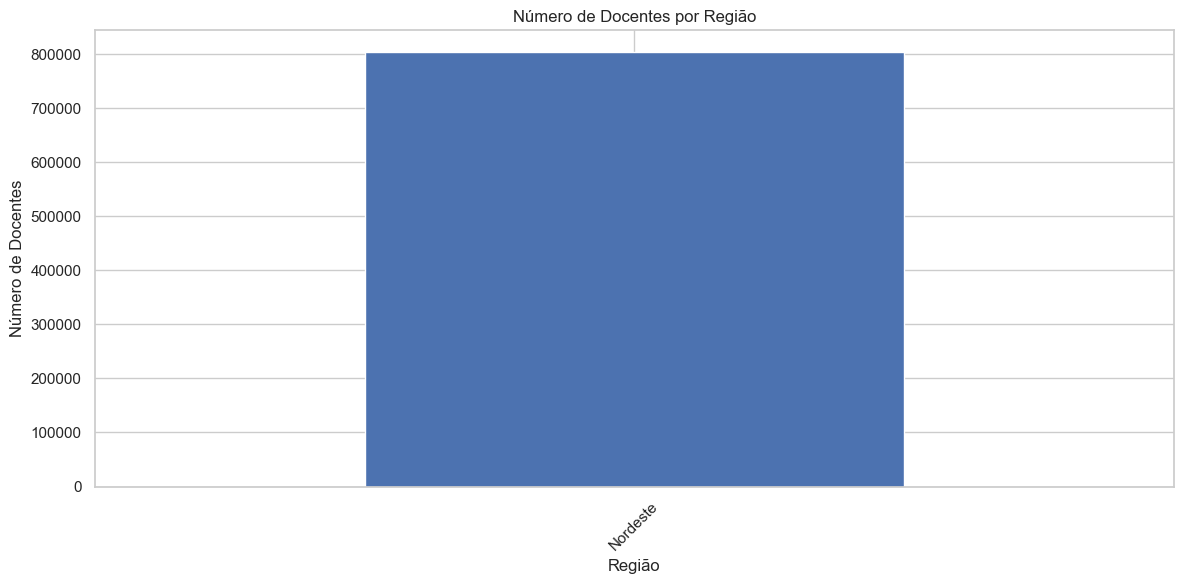

In [8]:
# Verificando a distribuição de docentes por região
plt.figure(figsize=(12, 6))
regiao_counts = df[df['CATEGORIA'] == 'Total'].groupby('REGIAO')['NUMERO_DOCENTES'].sum()
regiao_counts.plot(kind='bar')
plt.title('Número de Docentes por Região')
plt.xlabel('Região')
plt.ylabel('Número de Docentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

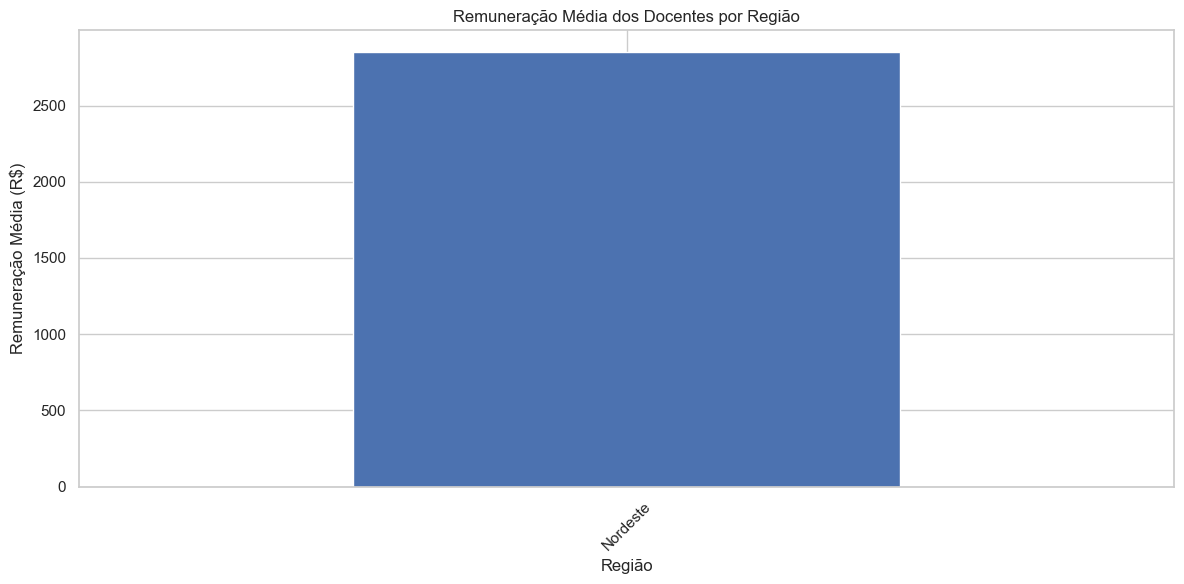

In [9]:
# Verificando a média salarial por região
plt.figure(figsize=(12, 6))
mean_salary = df[df['CATEGORIA'] == 'Total'].groupby('REGIAO')['REMUNERACAO_MEDIA'].mean()
mean_salary.plot(kind='bar')
plt.title('Remuneração Média dos Docentes por Região')
plt.xlabel('Região')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

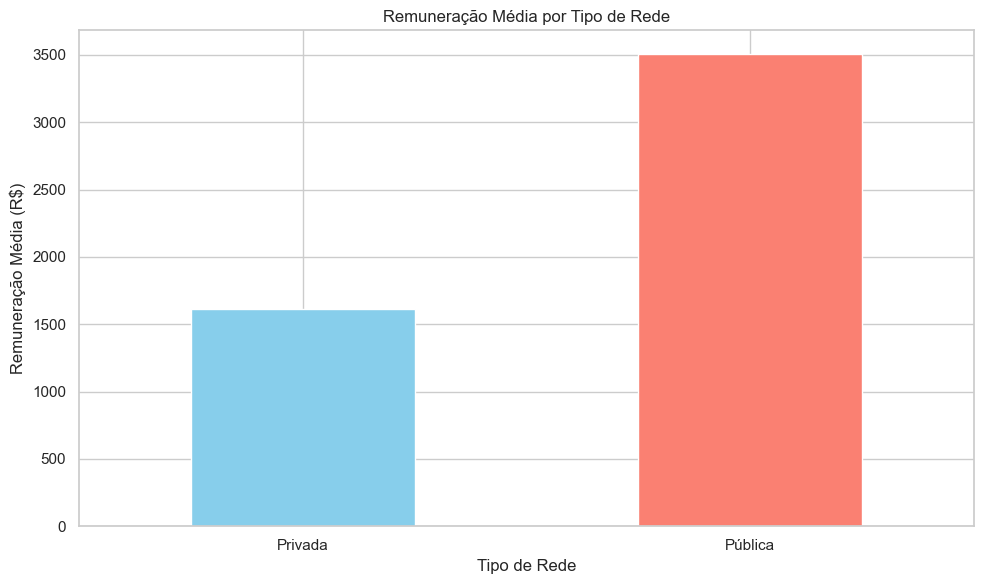

In [10]:
# Comparando remuneração média entre redes públicas e privadas
plt.figure(figsize=(10, 6))
network_salary = df[df['CATEGORIA'] == 'Total'].groupby('TIPO_REDE')['REMUNERACAO_MEDIA'].mean()
network_salary.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Remuneração Média por Tipo de Rede')
plt.xlabel('Tipo de Rede')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

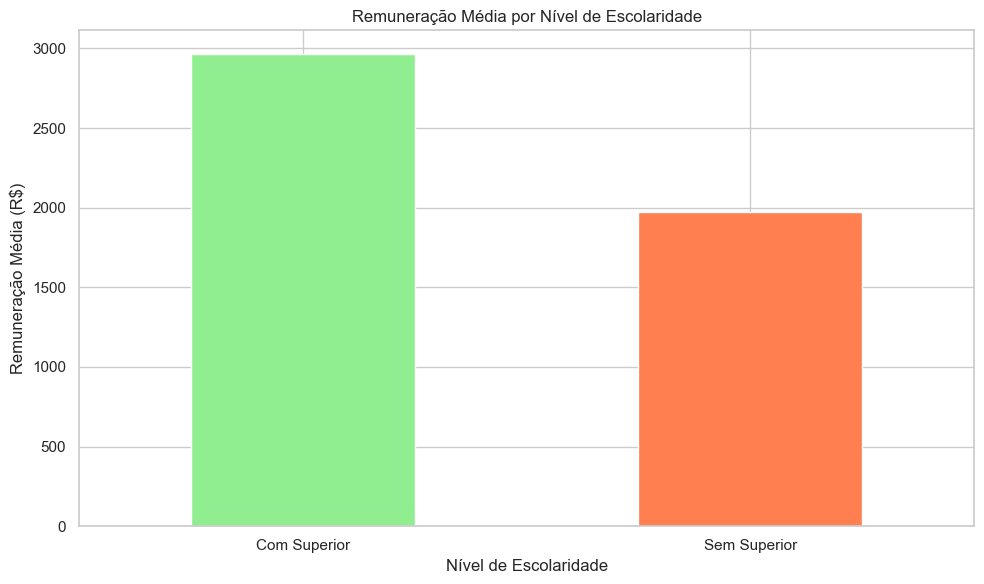

In [11]:
# Comparando remuneração média entre docentes com e sem ensino superior
plt.figure(figsize=(10, 6))
education_salary = df[df['CATEGORIA'] != 'Total'].groupby('CATEGORIA')['REMUNERACAO_MEDIA'].mean()
education_salary.plot(kind='bar', color=['lightgreen', 'coral'])
plt.title('Remuneração Média por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

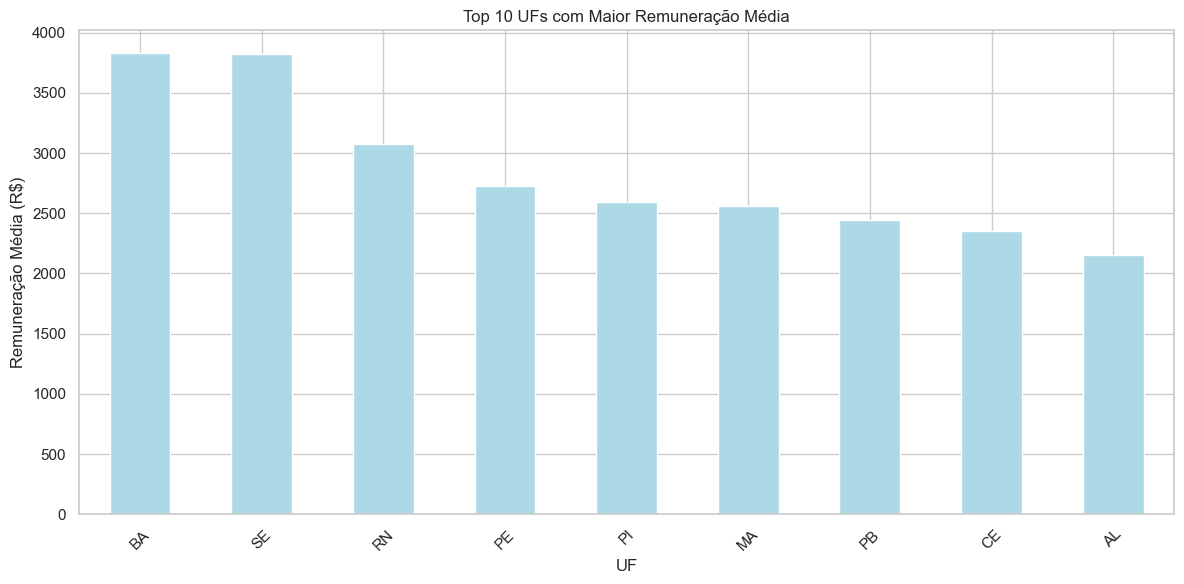

In [12]:
# Top 10 UFs com maior remuneração média
top_uf_salary = df[df['CATEGORIA'] == 'Total'].groupby('UF')['REMUNERACAO_MEDIA'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_uf_salary.plot(kind='bar', color='lightblue')
plt.title('Top 10 UFs com Maior Remuneração Média')
plt.xlabel('UF')
plt.ylabel('Remuneração Média (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

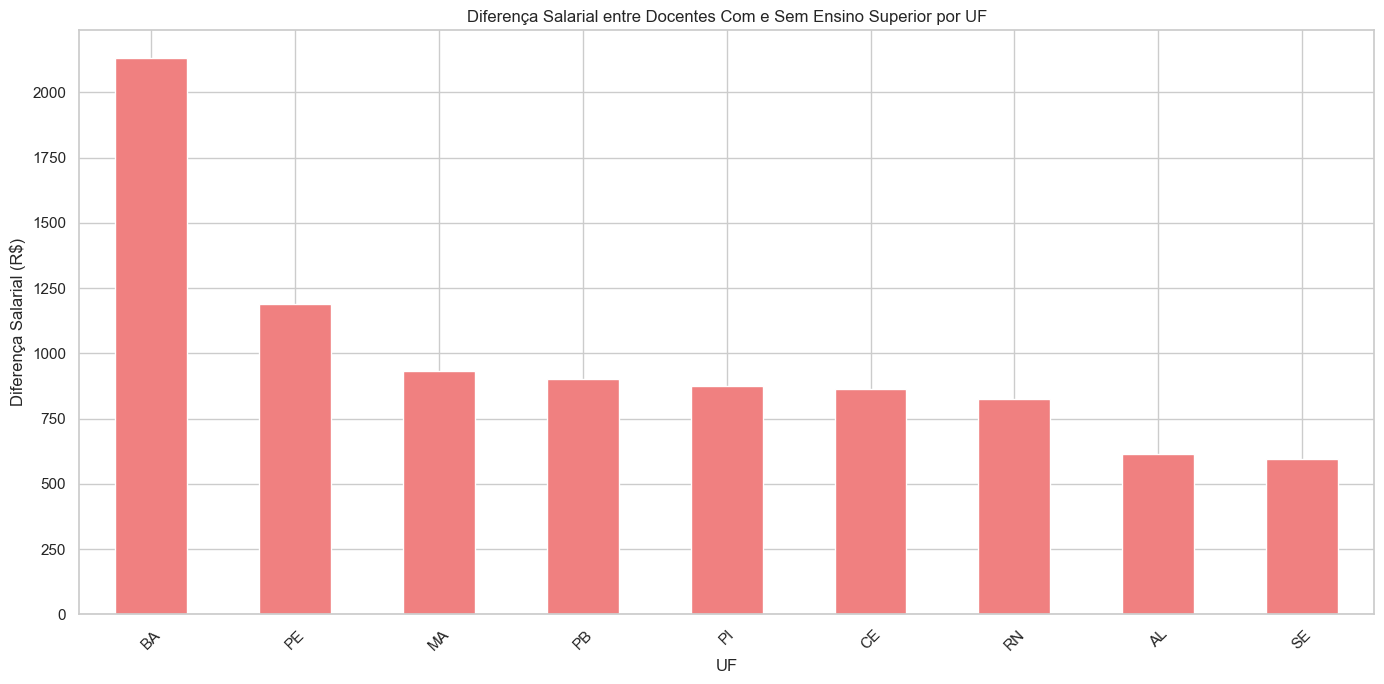

In [13]:
# Visualizando a diferença salarial entre docentes com e sem ensino superior por UF
if 'DIFERENCA_SALARIAL' in df.columns:
    diff_salary_by_uf = df[df['CATEGORIA'] == 'Total'].groupby('UF')['DIFERENCA_SALARIAL'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(14, 7))
    diff_salary_by_uf.plot(kind='bar', color='lightcoral')
    plt.title('Diferença Salarial entre Docentes Com e Sem Ensino Superior por UF')
    plt.xlabel('UF')
    plt.ylabel('Diferença Salarial (R$)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 6. Criando Dicionário de Metadados

In [15]:
# Criando um dicionário com informações dos metadados das colunas
metadados = {
    'ANO_CENSO': 'Ano de referência do Censo Escolar',
    'REGIAO': 'Região do Brasil',
    'UF': 'Unidade Federativa',
    'DEPENDENCIA': 'Dependência administrativa (Estadual, Municipal, Federal, Privada)',
    'CATEGORIA': 'Categoria dos docentes (Total, Com Superior, Sem Superior)',
    'NUMERO_DOCENTES': 'Número total de docentes',
    'PERCENTUAL_DOC_TEMPO_INTEGRAL': 'Percentual de docentes em tempo integral',
    'REMUNERACAO_MINIMA': 'Valor mínimo da remuneração dos docentes',
    'REMUNERACAO_MEDIANA': 'Valor mediano da remuneração dos docentes',
    'REMUNERACAO_MEDIA': 'Valor médio da remuneração dos docentes',
    'REMUNERACAO_75_PERCENTIL': 'Valor do 75º percentil da remuneração dos docentes',
    'DESVIO_PADRAO_REMUNERACAO': 'Desvio padrão da remuneração dos docentes',
    'COEF_VARIACAO_PERC': 'Coeficiente de variação da remuneração em percentual',
    'REMUNERACAO_MEDIA_40H': 'Remuneração média para jornada de 40 horas semanais',
    'TIPO_REDE': 'Tipo de rede de ensino (Pública ou Privada)',
    'DIFERENCA_SALARIAL': 'Diferença salarial entre docentes com e sem ensino superior'
}

# Salvando metadados como um DataFrame
metadados_df = pd.DataFrame(list(metadados.items()), columns=['Coluna', 'Descrição'])
metadados_df

,Coluna,Descrição
0,ANO_CENSO,Ano de referência do Censo Escolar
1,REGIAO,Região do Brasil
2,UF,Unidade Federativa
3,DEPENDENCIA,"Dependência administrativa (Estadual, Municipa..."
4,CATEGORIA,"Categoria dos docentes (Total, Com Superior, S..."
5,NUMERO_DOCENTES,Número total de docentes
6,PERCENTUAL_DOC_TEMPO_INTEGRAL,Percentual de docentes em tempo integral
7,REMUNERACAO_MINIMA,Valor mínimo da remuneração dos docentes
8,REMUNERACAO_MEDIANA,Valor mediano da remuneração dos docentes
9,REMUNERACAO_MEDIA,Valor médio da remuneração dos docentes


## 7. Exportando os Dados Tratados

In [16]:
# Definindo o nome do arquivo de saída
nome_arquivo = 'dados_remuneracao_tratados_v2.xlsx'
caminho_saida = os.path.join('datasets', nome_arquivo)

# Criando um objeto ExcelWriter
with pd.ExcelWriter(caminho_saida, engine='openpyxl') as writer:
    # Salvando o DataFrame completo
    df.to_excel(writer, sheet_name='Dados_Completos', index=False)
    
    # Criando abas adicionais com visões específicas
    # Visão por Região
    pivot_regiao = df.pivot_table(
        index='REGIAO',
        values=['REMUNERACAO_MEDIA', 'REMUNERACAO_MINIMA', 'REMUNERACAO_MEDIANA', 'NUMERO_DOCENTES'],
        aggfunc={'REMUNERACAO_MEDIA': 'mean', 'REMUNERACAO_MINIMA': 'min', 
                'REMUNERACAO_MEDIANA': 'median', 'NUMERO_DOCENTES': 'sum'}
    ).reset_index()
    pivot_regiao.to_excel(writer, sheet_name='Resumo_Regiao', index=False)
    
    # Visão por UF
    pivot_uf = df.pivot_table(
        index=['REGIAO', 'UF'],
        values=['REMUNERACAO_MEDIA', 'REMUNERACAO_MINIMA', 'REMUNERACAO_MEDIANA', 'NUMERO_DOCENTES'],
        aggfunc={'REMUNERACAO_MEDIA': 'mean', 'REMUNERACAO_MINIMA': 'min', 
                'REMUNERACAO_MEDIANA': 'median', 'NUMERO_DOCENTES': 'sum'}
    ).reset_index()
    pivot_uf.to_excel(writer, sheet_name='Resumo_UF', index=False)
    
    # Visão por Tipo de Rede (Pública x Privada)
    pivot_rede = df.pivot_table(
        index=['TIPO_REDE', 'DEPENDENCIA'],
        values=['REMUNERACAO_MEDIA', 'REMUNERACAO_MINIMA', 'REMUNERACAO_MEDIANA', 'NUMERO_DOCENTES'],
        aggfunc={'REMUNERACAO_MEDIA': 'mean', 'REMUNERACAO_MINIMA': 'min', 
                'REMUNERACAO_MEDIANA': 'median', 'NUMERO_DOCENTES': 'sum'}
    ).reset_index()
    pivot_rede.to_excel(writer, sheet_name='Resumo_Tipo_Rede', index=False)
    
    # Visão por Escolaridade (Com Superior x Sem Superior)
    pivot_escolaridade = df[df['CATEGORIA'] != 'Total'].pivot_table(
        index='CATEGORIA',
        values=['REMUNERACAO_MEDIA', 'REMUNERACAO_MINIMA', 'REMUNERACAO_MEDIANA', 'NUMERO_DOCENTES'],
        aggfunc={'REMUNERACAO_MEDIA': 'mean', 'REMUNERACAO_MINIMA': 'min', 
                'REMUNERACAO_MEDIANA': 'median', 'NUMERO_DOCENTES': 'sum'}
    ).reset_index()
    pivot_escolaridade.to_excel(writer, sheet_name='Resumo_Escolaridade', index=False)
    
    # Adicionando uma aba específica para análise de diferença salarial
    if 'DIFERENCA_SALARIAL' in df.columns:
        pivot_dif_salarial = df[df['CATEGORIA'] == 'Total'].pivot_table(
            index=['REGIAO', 'UF', 'DEPENDENCIA'],
            values=['DIFERENCA_SALARIAL'],
            aggfunc={'DIFERENCA_SALARIAL': 'mean'}
        ).reset_index()
        pivot_dif_salarial = pivot_dif_salarial.sort_values('DIFERENCA_SALARIAL', ascending=False)
        pivot_dif_salarial.to_excel(writer, sheet_name='Diferenca_Salarial', index=False)
    
    # Salvando os metadados
    metadados_df.to_excel(writer, sheet_name='Metadados', index=False)

print(f"Dados salvos com sucesso em {caminho_saida}!")

Dados salvos com sucesso em datasets\dados_remuneracao_tratados_v2.xlsx!


## 8. Resumo e Conclusão

### Resumo do Tratamento Realizado

1. **Limpeza de Dados**:
   - Remoção de linhas com valores ausentes nas colunas principais
   - Conversão de tipos de dados para formatos apropriados
   - Arredondamento de valores numéricos para melhor visualização

2. **Transformações**:
   - Definição de nomes de colunas descritivos durante a carga dos dados
   - Adição de coluna para tipo de rede (pública ou privada)
   - Cálculo da diferença salarial entre docentes com e sem ensino superior

3. **Exportação**:
   - Dados completos com todas as informações tratadas
   - Visões resumidas por região, UF, tipo de rede e escolaridade
   - Análise específica da diferença salarial
   - Metadados das colunas para facilitar o entendimento

### Principais Insights

- Existem diferenças significativas na remuneração média entre as regiões do Brasil
- Docentes da rede pública geralmente têm remuneração média superior aos da rede privada
- Há uma diferença salarial considerável entre docentes com e sem ensino superior
- Alguns estados se destacam com remunerações médias significativamente maiores que outros
